<a href="https://colab.research.google.com/github/liortiz/ML-2021/blob/main/ML_2021_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h3><center>Introducción al Aprendizaje de Máquina</center>
<center>2021-I</center>
<center>Lizeth Catherine Ortiz Pulido</center>
<center>liortiz@unal.edu.co</center></h3>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1
Learning from data, Exercice 1.12

Una amiga se le acerca con un problema de aprendizaje. Ella dice que la función objetivo $f$ es completamente desconocida, pero tiene 4,000 puntos de datos.  Ella está dispuesta a pagarte para que resuelvas su problema y le produzca una $g$ que se aproxime a $f$.  ¿Qué es lo mejor que puede prometerle entre los siguientes:

*   (a) Después de aprender, le proporcionará $g$ que garantizará aproximadamente $f$ bien fuera de la muestra 

*   (b) Después de aprender, le proporcionará una $g$, y con una alta probabilidad de que la $g$ que produzca se aproximará bastante a $f$ fuera de la muestra. 

*   (c) Sucederá una de dos cosas.
  1.   Producirá una hipótesis $g$;
  2.   Declarará que fracasó.

  Si devuelve una hipótesis $g$, entonces con alta probabilidad la $g$ que produzca se aproximará a $f$ muy fuera de la muestra.




En estos casos no sabemos qué tan compleja puede ser $f$ y si lo fuera no se podrá aprender del todo. Pero al tener una gran cantidad de datos se prodrían generar muy buenos entrenamientos que aseguren que $g$ se aproxime bien fuera de las muestras. Así que lo que le prometo es (c).




# Ejercicio 2
Learning from data, Problem 1.2

Considere el perceptrón en dos dimensiones: $h(x)=$ sing$(w^Tx)$ donde $w=[w_0,w_1,w_2]^T$ y $x=[1,x_1,x_2]^T$. Técnicamente, $x$ tiene tres coordenadas, pero llamamos a este perceptrón bidimensional porque la primera coordenada es 1. 



(a) Demuestre que las regiones en el plano donde $h(x)=+1$ y $h(x)=-1$ están separadas por una línea. Si expresamos esta línea mediante la ecuación $x_2=ax_1+b$, ¿Cuál es la pendiente $a$ y la intersección $b$ en términos de $w_0, w_1, w_2$? 

Para $h(x)=+1$ se tiene que $w^Tx>0$ y para $h(x)=-1$ se tiene que $w^Tx< 0$ entonces la línea que separa las regiones está dada por $w^Tx=0$, así:
$$
\left.
    \begin{array}\\
        w^Tx &= w_0+w_1x_1+w_2x_2\\
        &= w_0+w_1x_1+w_2x_2 &=0\\
        &= w_2x_2 &=-w_0-w_1x_1\\
        &= x_2 &=-\frac{w_0}{w_2}-\frac{w_1}{w_2}x_1\\
    \end{array}
\right.
$$
Entonces podemos ver que $a=-\frac{w_1}{w_2}$ y $b=-\frac{w_0}{w_2}$.

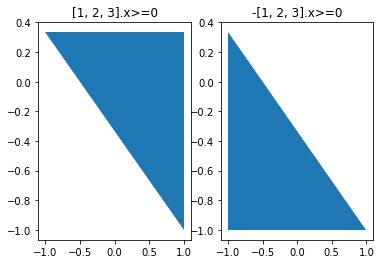

In [2]:
def f(x):
    return (-1/3)-(2/3)*x

plt.subplot(1,2,1)
plt.title("[1, 2, 3].x>=0")
x1,y1 = 1, f(1)
x2,y2 = 1,f(-1)
x3,y3 = -1, f(-1)
plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1])

plt.subplot(1,2,2)
plt.title("-[1, 2, 3].x>=0")
x1,y1 = 1, f(1)
x2,y2 = -1,-1
x3,y3 = -1, f(-1)
plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1])

plt.show()

En más  que dos dimensiones, las regiones +1 y -1 están separadas por un hiperplano, la generalización de una línea.

# Ejercicio 3
Learning from data, Problem 1.4

En el ejercicio 1.4, usamos un conjunto de datos artificiales para estudiar el algoritmo de aprendizaje del perceptrón.  Este problema lo lleva a explorar más el algoritmo con conjuntos de datos de diferentes tamaños y dimensiones.  

  

(a) Genere un conjunto de datos separables linealmente de tamaño 20 como se indica en el ejercicio 1.4.  Grafique los ejemplos $\{(x_n, y_n)\}$ así como la función objetivo $f$ en un plano.  Asegúrese de marcar los ejemplos de diferentes clases de manera diferente.  y agregue etiquetas a los ejes del gráfico.

In [3]:
#h(x)=sign(w^Tx)
def sign(a1, a2): 
  if np.dot(a1, a2) >= 0:
    return 1
  else:
    return -1

def plot(data,w):
  r = [[],[]] # 1
  b = [[],[]] #-1

  for i in range(len(data)):
    if data[i][1] == 1:
      r[0].append(data[i][0][1])
      r[1].append(data[i][0][2])
    else:
      b[0].append(data[i][0][1])
      b[1].append(data[i][0][2])

  plt.scatter(r[0],r[1],color='red')
  plt.scatter(b[0],b[1],color='blue')
  plt.plot([-1,1], [(-w[0]+w[1])/w[2],(-w[0]-w[1])/w[2]],color='green') #f

  plt.xlim(-1.1,1.1)
  plt.ylim(-1.2,1.2)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

def plot2(data,wf,wg):
  r = [[],[]] # 1
  b = [[],[]] #-1

  for i in range(len(data)):
    if data[i][1] == 1:
      r[0].append(data[i][0][1])
      r[1].append(data[i][0][2])
    else:
      b[0].append(data[i][0][1])
      b[1].append(data[i][0][2])

  plt.scatter(r[0],r[1],color='red')
  plt.scatter(b[0],b[1],color='blue')
  plt.plot([-1,1], [(-wf[0]+wf[1])/wf[2],(-wf[0]-wf[1])/wf[2]],color='green', label = 'f') #f
  plt.plot([-1,1], [(-wg[0]+wg[1])/wg[2],(-wg[0]-wg[1])/wg[2]],color='orange', label = 'g') #g
  plt.legend()

  plt.xlim(-1.1,1.1)
  plt.ylim(-1.2,1.2)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

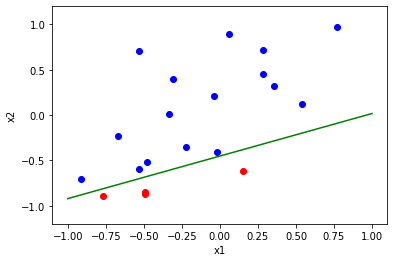

In [4]:
def generate_f_D(n):
  # f dado por w
  # Los valores se escogen para que f siempre se pueda representar bien en [-1,1]x[-1,1]
  w = [random.uniform(-10, 10)]
  w.append(random.uniform(2*w[0], 10))
  w.append(random.uniform(-10, 10))

  # Conjunto de datos con su clasificación
  data_set = []
  for i in range(n):
    x = [1, random.uniform(-1, 1), random.uniform(-1, 1)]
    y = sign(w, x)
    data_set.append([x,y])

  return data_set, w

data, w = generate_f_D(20)
plot(data,w)

(b) Ejecute el algoritmo de aprendizaje del perceptrón en el conjunto de datos anterior.  Informe el número de actualizaciones que realiza el algoritmo antes de converger.  Grafique los ejemplos $\{(x_n, y_n)\}$, la función objetivo $f$.  y la hipótesis final $g$ en la misma figura.  Comente si $f$ está cerca de $g$.  

In [5]:
def misclassified(data,w):
  m = []
  for x in data:
    # y(t) != sign(w^T(t),x(t))
    if x[1] != sign(w,x[0]):
      m.append(x)
  return m

Actualizaciones: 10


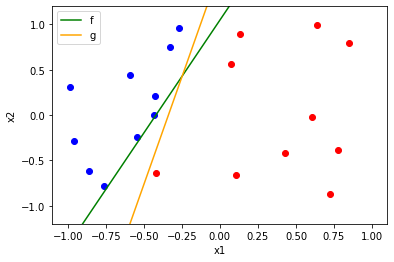

In [6]:
def perceptron(data_set):
  # num actualizaciones
  act = 0

  # g dado por w
  w = [random.uniform(-10, 10)]
  w.append(random.uniform(2*w[0], 10))
  w.append(random.uniform(-10, 10))
  w = np.array(w)

  m = misclassified(data_set,w)

  # update rule
  while m!=[]:
    for x in m: 
      w = w + x[1]*np.array(x[0])    
      act += 1  
    m = misclassified(data_set,w)
  print("Actualizaciones:",act)
  return w

data, wf = generate_f_D(20)
wg = perceptron(data)
plot2(data,wf,wg)

El acercamiento de $g$ a $f$ depende del espacio que se encuentra entre los puntos azules y rojos, ya que si ese espacio es muy amplio, se pueden definir más $g$ que separe los puntos pero que no se parezca mucho a $f$.

(c) Repita todo en (b) con otro conjunto de datos generado aleatoriamente de tamaño 20. Compare sus resultados con (b).  

Actualizaciones: 8


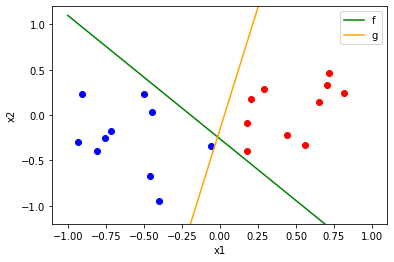

In [15]:
data, wf = generate_f_D(20)
wg = perceptron(data)
plot2(data,wf,wg)

Como pondemos ver, el algoritmo encontró una $g$ muy diferente a la $f$ pero que cumple y el número de actualizaciones no es constante pero la diferencia no es grande.

(d) Repita todo en (b) con otro conjunto de datos generado aleatoriamente de tamaño 100. Compare sus resultados con (b).   

Actualizaciones: 146


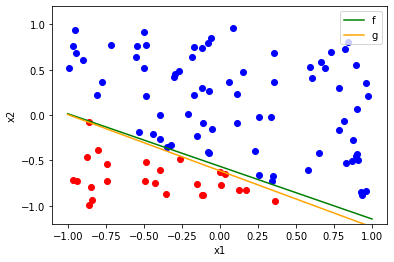

In [8]:
data, wf = generate_f_D(100)
wg = perceptron(data)
plot2(data,wf,wg)

Cuando tenemos más datos es mas probable que nuestra primera hipótisis genere muchos errores por eso las repeteciones aumentan y por otra parte es más probable que $g$ se acerque mucho a $f$ ya que tenemos más datos.

(e) Repita todo en (b) con otro conjunto de datos generado aleatoriamente de tamaño 1000. Compare sus resultados con (b). 

Actualizaciones: 1426


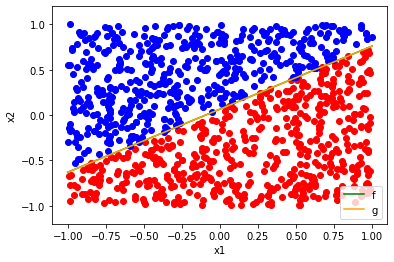

In [9]:
data, wf = generate_f_D(1000)
wg = perceptron(data)
plot2(data,wf,wg)

Más datos, mejor resultado pero más tiempo

(f) Modifique el algoritmo de manera que tome $x_n\in\mathbb{R}^{10}$ en lugar de $\mathbb{R}^2$. Genere aleatoriamente un conjunto de datos separables linealmente de tamaño 1,000 con $x_n\in\mathbb{R}^{10}$ y alimente el conjunto de datos al algoritmo.  ¿Cuántas actualizaciones necesita el algoritmo para converger?  

In [10]:
def generate_f_D10(n):
  # f dado por w
  w = []
  for i in range(11):
    w.append(random.uniform(-10, 10))

  # Conjunto de datos con su clasificación
  data_set = []
  for i in range(n):
    x = [1]
    for i in range(10):
      x.append(random.uniform(-1, 1))
    y = sign(w, x)
    data_set.append([x,y])

  return data_set, w

def perceptron10(data_set):
  # num actualizaciones
  act = 0

  # g dado por w
  w = []
  for i in range(11):
    w.append(random.uniform(-10, 10))
  w = np.array(w)
  
  m = misclassified(data_set,w)

  # update rule
  while m!=[]:
    for x in m: 
      w = w + x[1]*np.array(x[0])    
      act += 1  
    m = misclassified(data_set,w)
  return act

data, w = generate_f_D10(20)
print("Actualizaciones:",perceptron10(data))

Actualizaciones: 60


(g) Repita el algoritmo en el mismo conjunto de datos que (f) para 100 experimentos.  En las iteraciones de cada experimento, elija $x(t)$ de forma aleatoria en lugar de determinista.  Trace un histograma para el número de actualizaciones que el algoritmo necesita para converger.

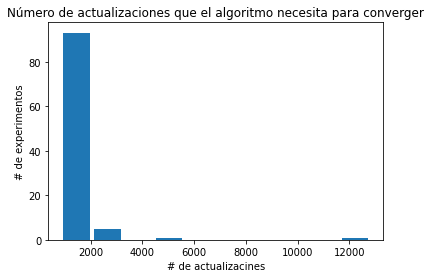

In [11]:
def perceptronA(data_set):
  # num actualizaciones
  act = 0

  # g dado por w
  w = []
  for i in range(11):
    w.append(random.uniform(-10, 10))
  w = np.array(w)
  
  m = misclassified(data_set,w)

  # update rule
  while m!=[]:
    for i in range(len(m)):
      x = random.choice(m) 
      m.remove(x)
      w = w + x[1]*np.array(x[0])    
      act += 1  
    m = misclassified(data_set,w)
  return act
  
a = []
for i in range(100):
  data, w = generate_f_D10(1000)
  a.append(perceptronA(data))
plt.hist(a,rwidth=0.85)
plt.title('Número de actualizaciones que el algoritmo necesita para converger')
plt.xlabel('# de actualizacines')
plt.ylabel('# de experimentos')
plt.show()

(h) Resuma sus conclusiones con respecto a la precisión y el tiempo de ejecución en función de $N$ y $d$

Entre más datos, o sea $N$ mayor, podemos encontrar un mejor $g$ que se aproxime a $f$ con un gran costo de tiempo, por otra parte así sean pocos datos, se puede encontrar sencillamente una $g$ que cumpla con clasificar pero que se diferencie mucho con $f$. Porte entre más grande $d$ tenemos que tiene que también aumenta el costo de tiempo pero no tan rápido como si aumentamos $N$.

# Ejercicio 4
Learning from data, Problem 1.6

Considere una muestra de 10 canicas extraídas independientemente de un recipiente que contiene canicas rojas y verdes.  La probabilidad de una canica roja es $\mu$.  Para $\mu=0.05$, $\mu= 0.5$ y $\mu = 0.8$, calcule la probabilidad de no obtener canicas rojas ($\nu= 0$) en los siguientes casos.  

(a) Extraemos solo una de esas muestras.  Calcule la probabilidad de que $\nu=0$. 

$$P[\nu=0]=(1-\mu)^n$$

In [12]:
print((1-0.05)**10)
print((1-0.5)**10)
print((1-0.8)**10)

0.5987369392383787
0.0009765625
1.0239999999999978e-07


(b) Extraemos 1000 muestras independientes.  Calcule la probabilidad de que (al menos) una de las muestras tenga $\nu=0$. 

Podemos ver el problema como el complemento de obtener al menos una canina roja en todas las muestras
$$1-[1-(1-\mu)^{10}]^{1000}$$

In [13]:
print(1-(1-(1-0.05)**10)**1000)
print(1-(1-(1-0.5)**10)**1000)
print(1-(1-(1-0.8)**10)**1000)

1.0
0.623576201943276
0.00010239476257623004


(c) Repita (b) para 1,000,000 muestras independientes.

In [14]:
print(1-(1-(1-0.05)**10)**1000000)
print(1-(1-(1-0.5)**10)**1000000)
print(1-(1-(1-0.8)**10)**1000000)

1.0
1.0
0.09733159268316072


# Ejercicio 5
Learning from data, Problem 1.9

En este problema, derivamos una forma de la ley de los grandes números que tiene un límite exponencial, llamado límite de Chernoff.  Nos enfocamos en el simple caso de lanzar una moneda al aire y usamos un enfoque similar al del problema 1.8.  



(a) Sea $t$ una variable aleatoria (finita), $\alpha$ una constante positiva y $s$ un parámetro positivo.  Si $T(s)= \mathbb{E}_t(e^{st})$, demuestre que $$\mathbb{P}[t\geq \alpha]\leq e^{-s\alpha}T(s)$$.  [Sugerencia: $e^{s\alpha}$ es monótonamente creciente en $t$.] 






Sea $X(t\geq\alpha)$ una variable aleatoria tal que si $t\geq\alpha$ entonces es igual a 1 y 0 de lo contrario.Como $e^{st}$ es monótonamente creciente entonces $e^{st}X(t\geq\alpha)\leq e^{st}$ además la esperanza es monótonamente creciente tenemos 
$$\begin{align*}
E[e^{\alpha t} X(t\geq\alpha)] &\leq E[e^{st}]\\
e^{\alpha t} E[X(t\geq\alpha)] &\leq E[e^{st}]\\
E[X(t\geq\alpha)] &\leq e^{-\alpha t}E[e^{st}]\\
P[t\geq\alpha] &\leq e^{st}T(s)\\
\end{align*}$$


(B) Sean $u_1,...,u_N$ variables aleatorias y sea $u=\frac{1}{N}\sum_{n=1}{N}u_n$. Si $U(s)=\mathbb{E}_{u_n}(e^{su_n})$ (para cualquier $n$), demuestre que, $$\mathbb{P}[u\geq\alpha]\leq(e^{-s\alpha}U (s))^N$$

Tomando $t=uN$ y reemplazando $\alpha$ por $N\alpha$ en el problema anterior tenemos 
$$\begin{align*}
P[uN\geq N\alpha] &\leq e^{sN\alpha}E[e^{suN}])\\
P[u \ge \alpha] &\le e^{-sN\alpha}E[e^{s\sum_{n=1}^{N}u_n}]\\
P[u \ge \alpha] &\le e^{-sN\alpha}E[\prod_{n=1}^{N}e^{su_n}]\\
P[u \ge \alpha] &\le e^{-sN\alpha}\prod_{n=1}^{N}E[e^{su_n}]\\
P[u \ge \alpha] &\le e^{-sN\alpha}E[e^{su_n}]^N\\
P[u \ge \alpha] &\le \left(e^{-s\alpha}U(s)\right)^N\\
\end{align*}$$

(c) Suponga que $\mathbb{P}[u_n=0]=\mathbb{P}[u_n = 1] =\frac{1}{2}$ (moneda justa). Evalúe $U (s)$ como una función de $s$, y minimice $e^{-s\alpha}U (s)$ con respecto a $s$ para un $\alpha$ fijo, $0 <\alpha <1$. 

$ U(s)=E(e^{su_n})=P(u_n=0)e^0+P(u_n=1)e^s=\frac{1}{2}(1+e^s)$, minimicemos $e^{-s\alpha}U(s)$ tomando su derivada con respecto a $s$ y sea igual a $0$, tenemos
$$-\alpha e^{-s\alpha}\frac{1}{2}(1+e^s)+e^{-s\alpha}\frac{1}{2}e^s=0$$
concluimos que $s=\ln{\frac{\alpha}{1-\alpha}}$ desde $0<\alpha<1$.

(d) Concluya en (c) que, para $0 <\epsilon<\frac{1}{2}$, $$\mathbb{P} [u\geq\mathbb{E}(u)+\epsilon]\leq 2^{-\beta N}$$ donde $\beta= 1+(\frac{1}{2}+ \epsilon)\log_2(\frac{1}{2}+\epsilon)+(\frac{1}{2}-\epsilon)log_2(\frac{1}{2}-\epsilon)$ y $\mathbb{E}(u)=\frac{1}{2}$ Demuestre que $\beta> 0$, por lo tanto, el límite disminuye exponencialmente en $N$.

Es fácil ver que $E[u]=\frac{1}{2}$. Sea $\alpha=E(u)+\epsilon=\frac{1}{2}+\epsilon$, entonces tenemos $P[u\geq E(u)+\epsilon]\le(e^{-s\alpha}U(s))^N$ del problema anterior. Dado que esta desigualdad es válida para cada $s>0$, también es válida para $s=\ln{\frac{\alpha}{1-\alpha}}$, tenemos
$$
\begin{align*}
e^{-s\alpha}U(s)&=e^{-s\alpha}\frac{1}{2}(1+e^s)\\
&=\frac{1}{2}e^{-\alpha\ln{\frac{\alpha}{1-\alpha}}}(1+e^{\ln{\frac{\alpha}{1-\alpha}}})\\
&=\frac{1}{2}\left(\frac{1-\alpha}{\alpha}\right)^{\alpha}(1+\frac{\alpha}{1-\alpha})\\
&=\frac{1}{2}\left(\frac{1-\alpha}{\alpha}\right)^{\alpha}\frac{1}{1-\alpha}\\
&=\frac{1}{2} \frac{(1-\alpha)^{\alpha-1}}{\alpha^{\alpha}}\\
&=\frac{1}{2}\frac{(\frac{1}{2}-\epsilon)^{\epsilon-\frac{1}{2}}}{(\frac{1}{2}+\epsilon)^{\frac{1}{2}+\epsilon}}\\
&=\frac{1}{2}\left(\frac{1}{2}-\epsilon\right)^{-(\frac{1}{2}-\epsilon)}\left(\frac{1}{2}+\epsilon\right)^{-(\frac{1}{2}+\epsilon)}\\
&=2^{-\beta}
\end{align*}
$$
